In [1]:
import pandas as pd

# Loading the datasets
purchase_behaviour_df = pd.read_csv('purchase_behaviour.csv')
transaction_data_df = pd.read_csv('transaction_data.csv')

# Displaying the first few rows of each dataset to understand their structure
purchase_behaviour_df.head(), transaction_data_df.head()

(   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
 0            1000   YOUNG SINGLES/COUPLES          Premium
 1            1002   YOUNG SINGLES/COUPLES       Mainstream
 2            1003          YOUNG FAMILIES           Budget
 3            1004   OLDER SINGLES/COUPLES       Mainstream
 4            1005  MIDAGE SINGLES/COUPLES       Mainstream,
     DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
 0  43390          1            1000       1         5   
 1  43599          1            1307     348        66   
 2  43605          1            1343     383        61   
 3  43329          2            2373     974        69   
 4  43330          2            2426    1038       108   
 
                                   PROD_NAME  PROD_QTY  TOT_SALES  
 0    Natural Chip        Compny SeaSalt175g         2        6.0  
 1                  CCs Nacho Cheese    175g         3        6.3  
 2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
 3    Smiths Chip

In [4]:
# Identify the top 3 most profitable products based on total sales
top_products = (
    transaction_data_df.groupby('PROD_NAME')['TOT_SALES']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

top_products

,PROD_NAME,TOT_SALES
0,Dorito Corn Chp Supreme 380g,40352.0
1,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
2,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
3,Kettle Mozzarella Basil & Pesto 175g,34457.4
4,Smiths Crinkle Original 330g,34302.6
5,Cheezels Cheese 330g,34296.9
6,Doritos Cheese Supreme 330g,33390.6
7,Kettle Sweet Chilli And Sour Cream 175g,33031.8
8,Kettle Original 175g,32740.2
9,Kettle Sea Salt And Vinegar 175g,32589.0


# Top 3 Most Profitable Products 

1. Dorito Corn Chip Supreme 380g - $40,352

2. Smiths Crinkle Chip Original Big Bag 380g - $36,367.6

3. Smiths Crinkle Chips Salt & Vinegar 330g - $34,804.2

To get a comprehensive view now i have to define loyal customers using both total spending and purchase frequency by merging the datasets using the LYLTY_CARD_NBR.

In [25]:
# Merging the transaction data with purchase behavior data
merged_df = pd.merge(transaction_data_df, purchase_behaviour_df, on='LYLTY_CARD_NBR', how='inner')

In [26]:
#  Now calculating total spending and purchase frequency for each customer
customer_loyalty = merged_df.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_spending=pd.NamedAgg(column='TOT_SALES', aggfunc='sum'),
    purchase_frequency=pd.NamedAgg(column='TXN_ID', aggfunc='nunique')
).reset_index()

In [27]:
# Now i have to define loyal customers as the top 10% by total spending
loyal_customers = customer_loyalty[customer_loyalty.total_spending >= customer_loyalty.total_spending.quantile(0.9)]

In [33]:
# Analyzing the characteristics of loyal customers
loyal_customer_characteristics = loyal_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='count')

# Sorting by count in descending order
loyal_customer_characteristics = loyal_customer_characteristics.sort_values(by=['count', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], ascending=[False, True, True])

loyal_customer_characteristics

,LIFESTAGE,PREMIUM_CUSTOMER,count
6,OLDER FAMILIES,Budget,1181
15,YOUNG FAMILIES,Budget,979
7,OLDER FAMILIES,Mainstream,772
16,YOUNG FAMILIES,Mainstream,582
8,OLDER FAMILIES,Premium,574
17,YOUNG FAMILIES,Premium,570
9,OLDER SINGLES/COUPLES,Budget,358
10,OLDER SINGLES/COUPLES,Mainstream,340
11,OLDER SINGLES/COUPLES,Premium,326
19,YOUNG SINGLES/COUPLES,Mainstream,316


# Characteristics of Loyal Customers 

Older Families (Budget) - 1,181 loyal customers

Young Families (Budget) - 979 loyal customers

Older Families (Mainstream) - 772 loyal customers

Young Families (Mainstream) - 582 loyal customers

Older Families (Premium) - 574 loyal customers

#  Hypotheses

# Older Families (Budget & Mainstream):

1. Family-Oriented Needs: Older families might have larger households, leading to more frequent bulk purchases.

2. Value for Money: Budget-conscious behavior may result from managing family expenses, driving loyalty towards affordable yet satisfying products.

# Young Families (Budget & Mainstream):

1. Growing Families: Young families could be in the early stages of building households, looking for cost-effective products.

2. Exploration & Consistency: They may be experimenting with new brands but tend to stick with ones offering good quality at a reasonable price.

# Premium Segments (Older & Young Families):
1. Quality Preference: Families with higher disposable income might favor premium products, valuing quality over cost.

2. Brand Loyalty: Positive experiences with premium products can foster stronger brand attachment.

# Marital Status (Implied through LIFESTAGE):

a. The Older Families and Young Families segments indicate that the loyal customers are likely married or in long-term relationships. These segments often involve household-based spending, with individuals managing family-related expenses.
The Midage Singles/Couples segment could have a mix of married or unmarried individuals, though many in this group may still be partnered.

b. Working or Retired (Implied through LIFESTAGE and PREMIUM_CUSTOMER):

The Retirees segment indicates that these loyal customers are likely retired.
Other groups, such as Young Families and Older Families, are likely to have working adults, with some possibly working part-time or full-time jobs to support family life.
Premium and mainstream segments suggest that there might be a mix of both working individuals and retirees, depending on the customer's disposable income.

# Let's create some visualizations to make these insights more engaging and easier to present.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Setting the plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

C:\Users\dashp\AppData\Local\Temp\ipykernel_9476\3105639856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_products, palette='viridis')


Text(0, 0.5, 'Product Name')

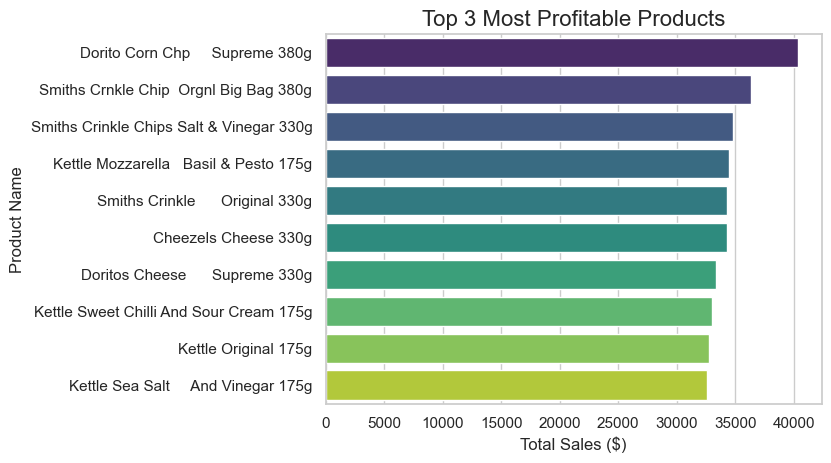

In [14]:
# 1. Top 3 Most Profitable Products
plt.subplot(1, 1, 1)
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_products, palette='viridis')
plt.title('Top 3 Most Profitable Products', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

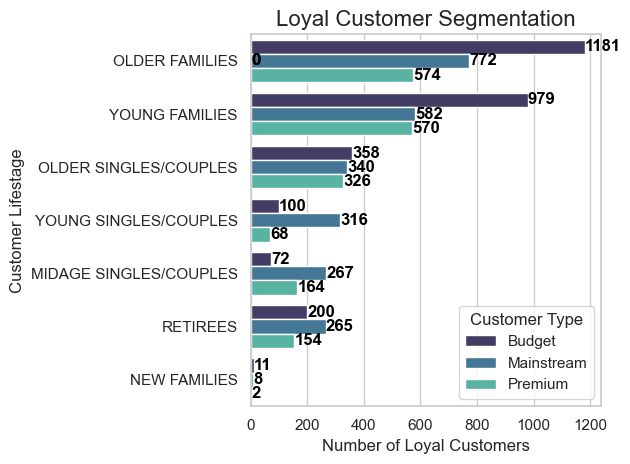

In [34]:
# Creating the bar plot
plt.subplot(1, 1, 1)
ax = sns.barplot(x='count', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=loyal_customer_characteristics, palette='mako')

# Adding the exact number beside the customer types
for p in ax.patches:
    width = p.get_width()  # Width of the bar (the value)
    height = p.get_height()  # Height of the bar
    x = p.get_x() + width + 0.2  # Position slightly to the right of the bar end
    y = p.get_y() + height / 2  # Position centered on the customer type row
    
    # Display the number beside the bar
    ax.text(x, y, f'{int(width)}', ha='left', va='center', fontsize=12, color='black', fontweight='bold')

# Set title and labels
plt.title('Loyal Customer Segmentation', fontsize=16)
plt.xlabel('Number of Loyal Customers', fontsize=12)
plt.ylabel('Customer Lifestage', fontsize=12)

# Set legend
plt.legend(title='Customer Type')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Here’s the approach for your project in 10 bullet points:

1. **Data Collection**: Import transaction and purchase behavior data, which includes customer transactions (e.g., `TOT_SALES`, `TXN_ID`) and customer characteristics (`LYLTY_CARD_NBR`, `LIFESTAGE`, `PREMIUM_CUSTOMER`).

2. **Data Preprocessing**: Clean and prepare the data by handling missing values, ensuring data consistency, and merging the transaction and behavior data on `LYLTY_CARD_NBR` to create a unified dataset.

3. **Customer Aggregation**: Group the merged dataset by `LYLTY_CARD_NBR`, `LIFESTAGE`, and `PREMIUM_CUSTOMER`, then calculate metrics like `total_spending` (sum of sales) and `purchase_frequency` (unique transaction count).

4. **Loyal Customer Definition**: Identify loyal customers as the top 10% of customers based on their `total_spending` value. This allows for targeted analysis on high-value customers.

5. **Customer Segmentation**: Segment loyal customers by `LIFESTAGE` and `PREMIUM_CUSTOMER` to observe purchasing patterns based on life stage (e.g., young families, retirees) and customer type (e.g., premium, budget).

6. **Feature Engineering**: Create derived features such as `total_spending` and `purchase_frequency` to better understand customer behavior and segmentation.

7. **Data Sorting**: Sort the loyal customers’ characteristics based on the frequency of occurrences (`count`), showing how many loyal customers exist in each segment.

8. **Visualization**: Use bar plots and other charts to visualize the loyalty distribution, allowing for a better understanding of customer behavior in different segments.

9. **Insights Extraction**: Analyze the characteristics of loyal customers and determine which segments are the most valuable, such as the most loyal customer types and life stages.

10. **Actionable Strategy**: Develop marketing and customer retention strategies based on the insights. For example, target specific segments (like "young families" or "older families") with personalized promotions based on their loyalty behavior.